# **Advance Regression Assignment**

## **Problem Statement**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.



# **Goal**
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.

In [122]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
# hide warnings
import warnings
warnings.filterwarnings('ignore')


# Read and Understand the data¶

In [70]:
# reading the input file

housing = pd.read_csv("train.csv")

housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
# checking the number of rows and columns
housing.shape


(1460, 81)

In [72]:
# To get the description of the dataset
housing.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [73]:
#Understand the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
# count the number of null values present in the data
round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

**Summary:**
1. There are 1460 rows and 81 columns in dataframe
2. These 81 columns comprises of both dimensions (categorical value) and measures (numeric value)
3. The dataset is not clean, i.e. consists of missing values as well


# **Cleaning Dataset**

In [75]:
# Dropping duplicate values in dataset, if exist
housing = housing.drop_duplicates()
print(f'\nShape of dataframe:\n{housing.shape}')
housing.head()


Shape of dataframe:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
# Removing identifier field
housing.drop(['Id'], axis=1, inplace=True)

In [77]:
# Removing columns where unique values are 1 as it illustrates that all values are same in column
uniques = housing.apply(lambda x:x.nunique())
housing = housing.drop(uniques[uniques < 2].index, axis = 1)
print(housing.shape)
print(((housing.isnull().sum()/housing.shape[0])*100).round(2))

(1460, 80)
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00


In [78]:
# Dropping Columns with more than 15 % missing values
housing.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)
print(((housing.isnull().sum()/housing.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [79]:
## Treating the NaN Values
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['Electrical'] = housing['Electrical'].fillna("Other")

In [80]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing[col] = housing[col].fillna('No_Basement')

In [81]:
#Imputing the NaN values with 'no garage'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing[col] = housing[col].fillna('No_Garage')

In [82]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [84]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)


In [85]:
print(((housing.isnull().sum()/housing.shape[0])*100).round(2))

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

# **Performing EDA**
# Univariate and Bivariate Analysis

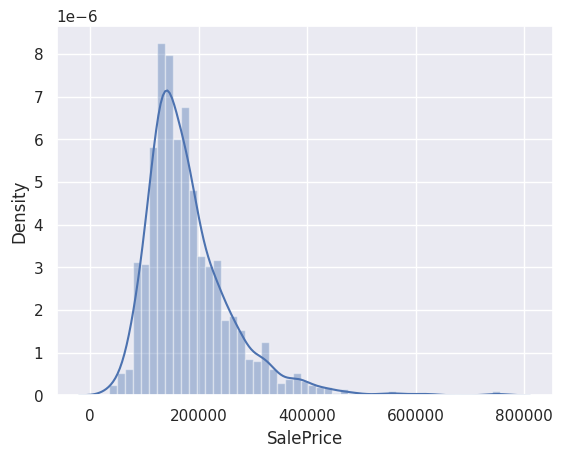

In [86]:
# Sale columns
plt.figure()
sns.distplot(housing['SalePrice'])
plt.show()

In [87]:
## Check the skewness of target variable
housing['SalePrice'].skew()

1.8828757597682129

In [88]:
## Check the kurtosis of target variable
housing['SalePrice'].kurt()

6.536281860064529

# **Summery** :
1. The skewness is greater than 1, so the target variable is highly skewed.¶
2. The kurtosis is greater than 1, so the distribution of target variable is highly peaked.¶

So, we will log transform our target variable¶

In [89]:
## Log transform the target variable
housing['SalePrice'] = np.log(housing['SalePrice'])

In [90]:
## Check the skewness of target variable
housing['SalePrice'].skew()

0.12133506220520406

In [91]:
## Check the kurtosis of target variable
housing['SalePrice'].kurt()

0.8095319958036296

Both skewness and kurtosis are less than 1 now.

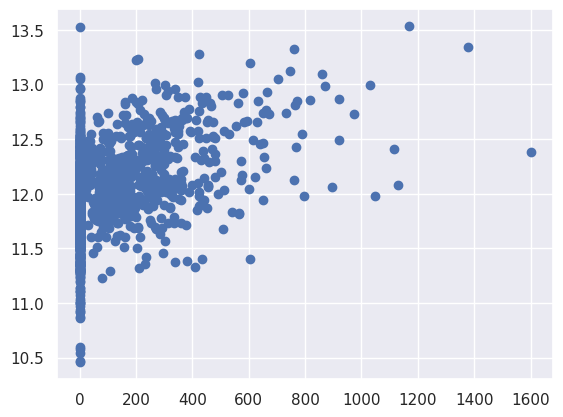

In [92]:
plt.scatter(housing.MasVnrArea,housing.SalePrice)

Text(0.5, 1.0, 'Basement Condition')

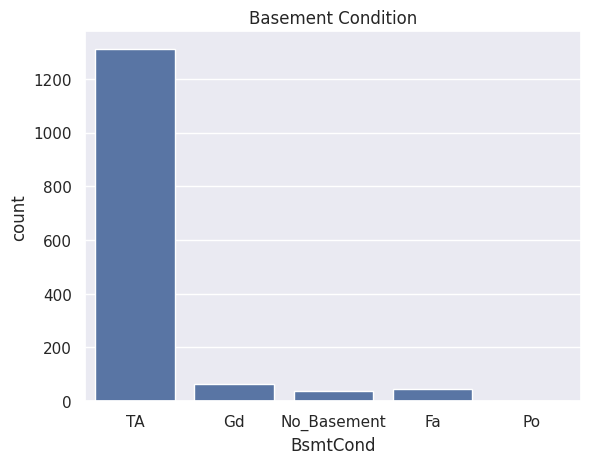

In [93]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= housing)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

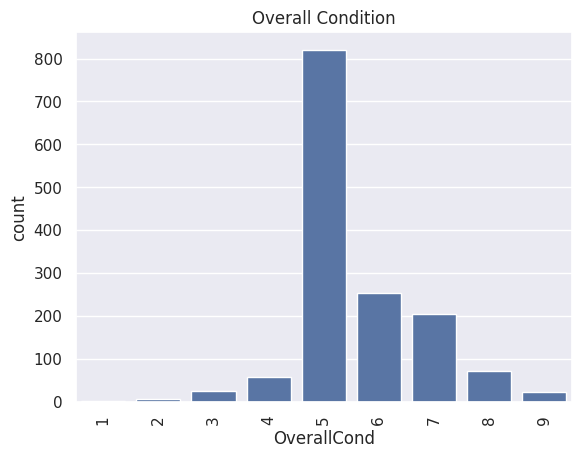

In [94]:
sns.countplot(x='OverallCond', data= housing).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

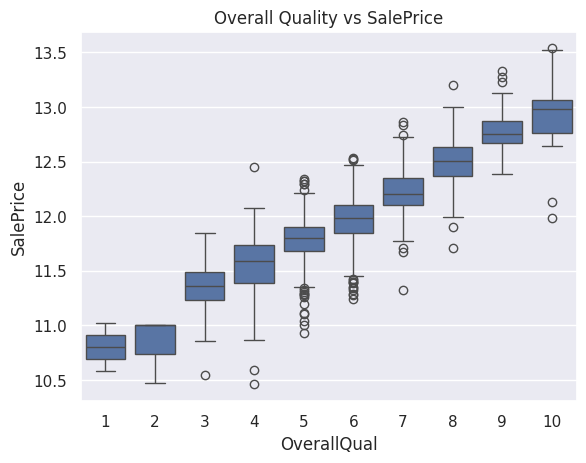

In [95]:
sns.boxplot(x='OverallQual', y='SalePrice', data=housing)
plt.title("Overall Quality vs SalePrice")

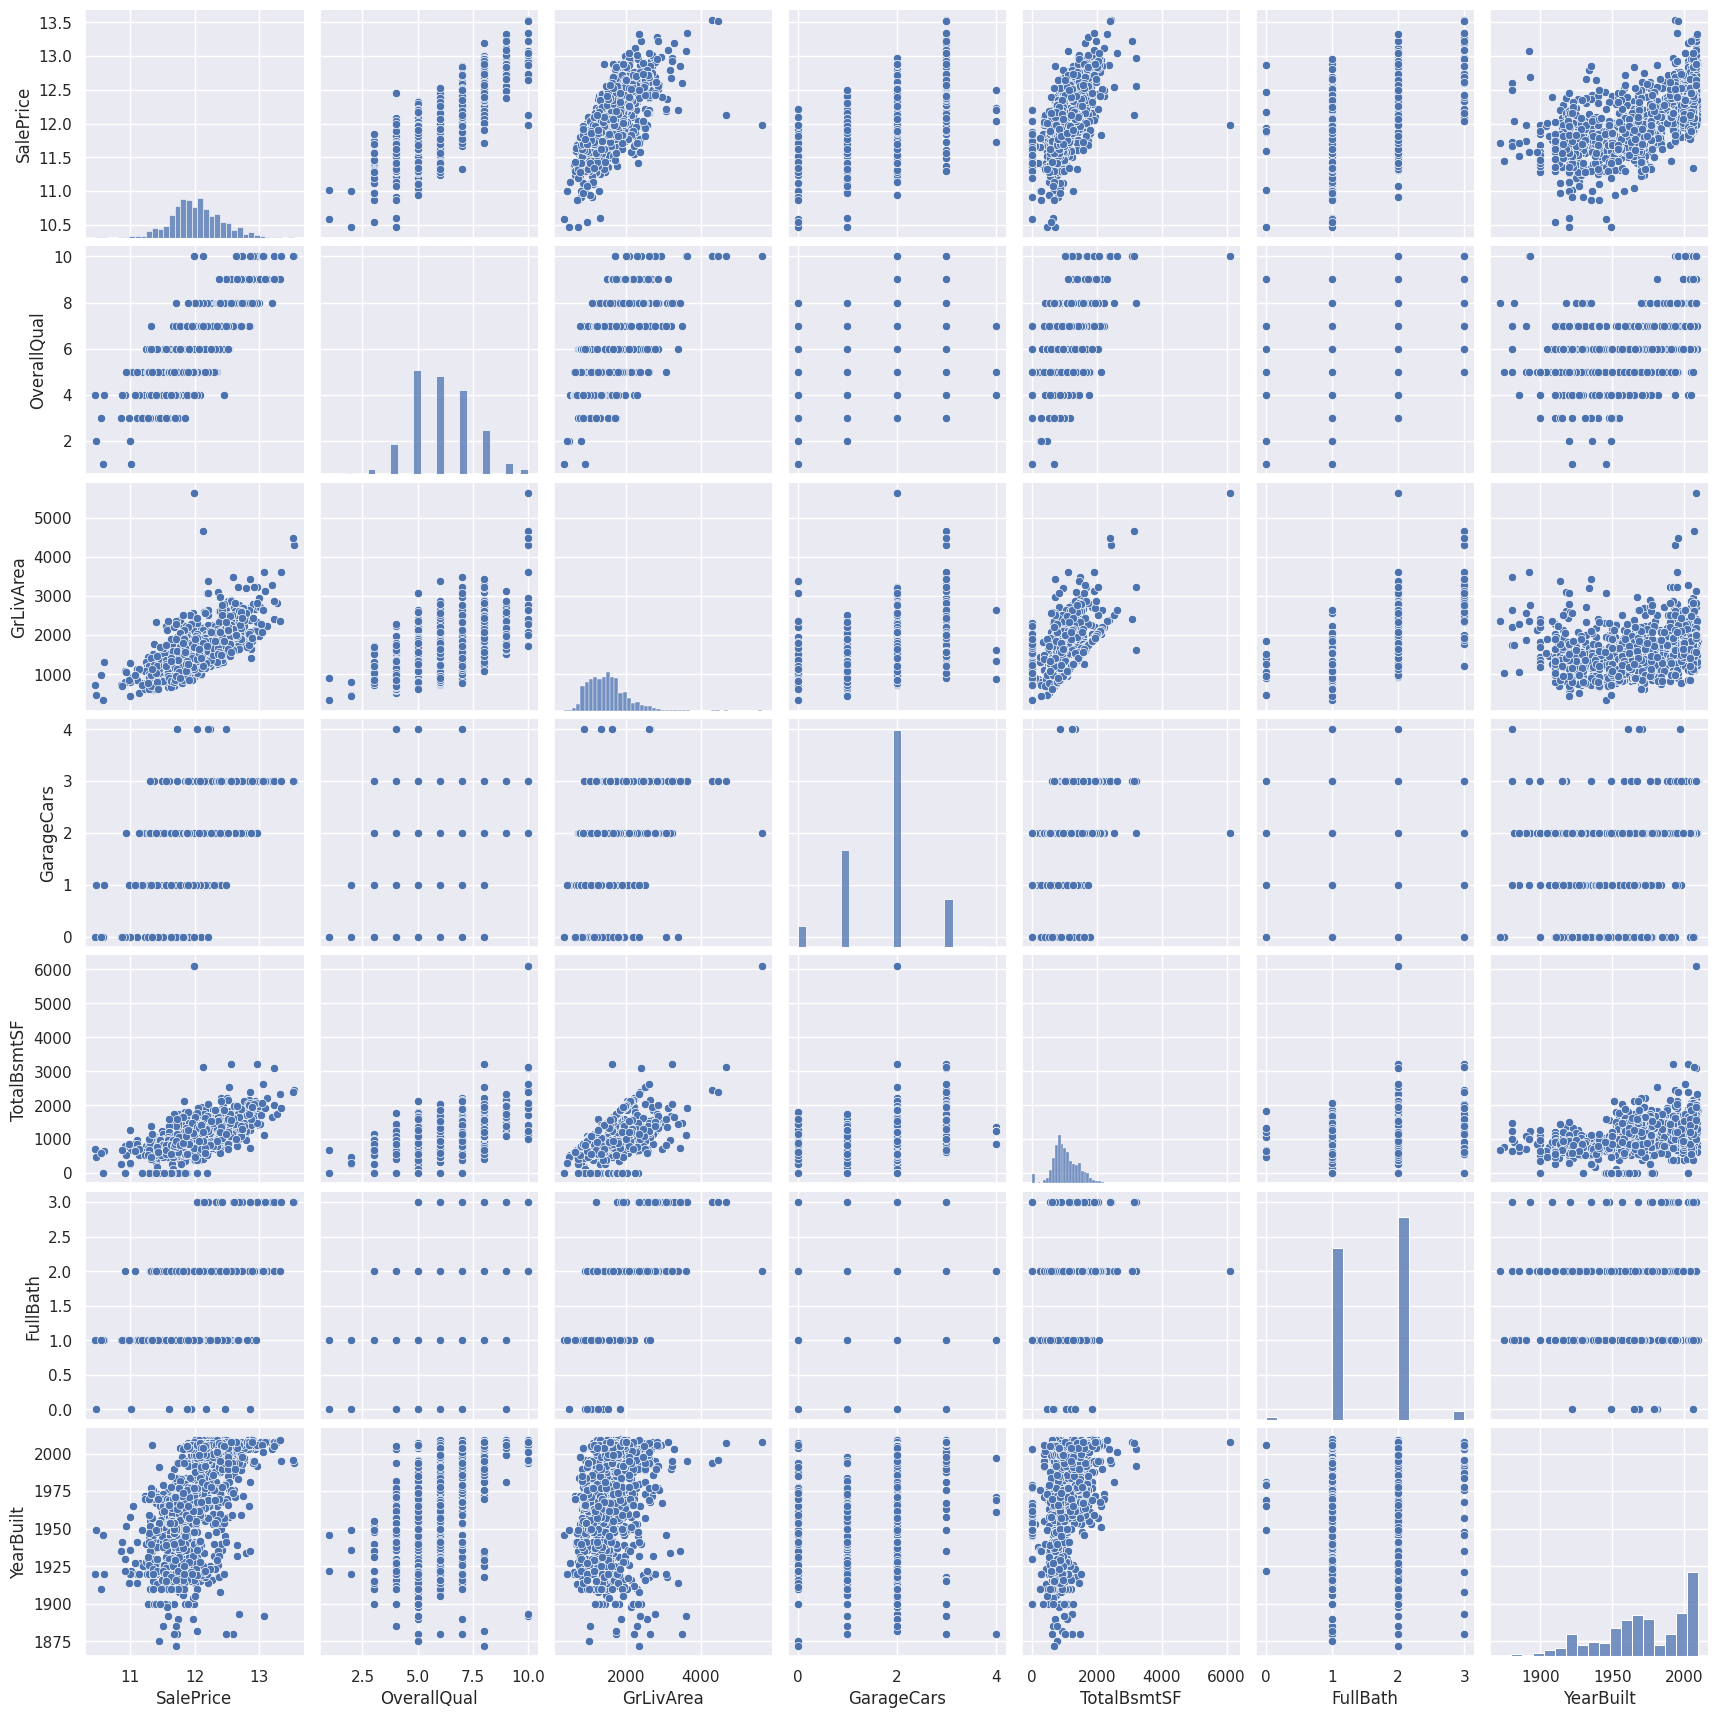

In [96]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

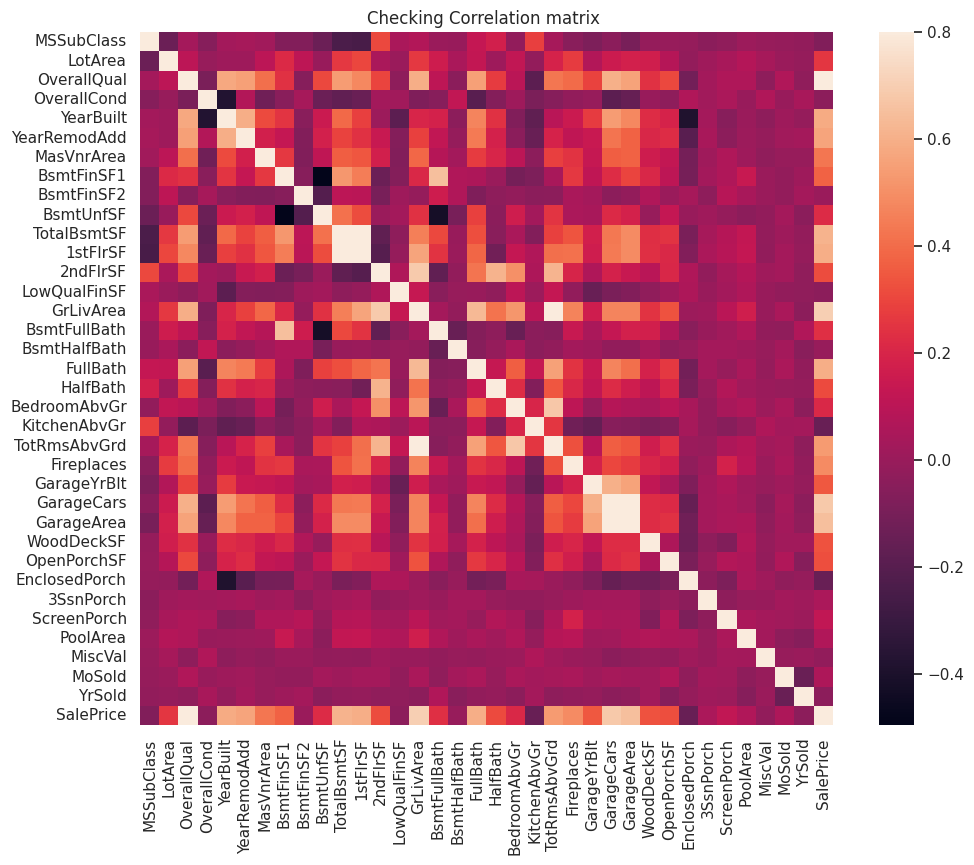

In [97]:
#checjing the correlation matrix
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

Categorial analysis

In [98]:
qualitative = [f for f in housing.columns if housing.dtypes[f] == 'object']

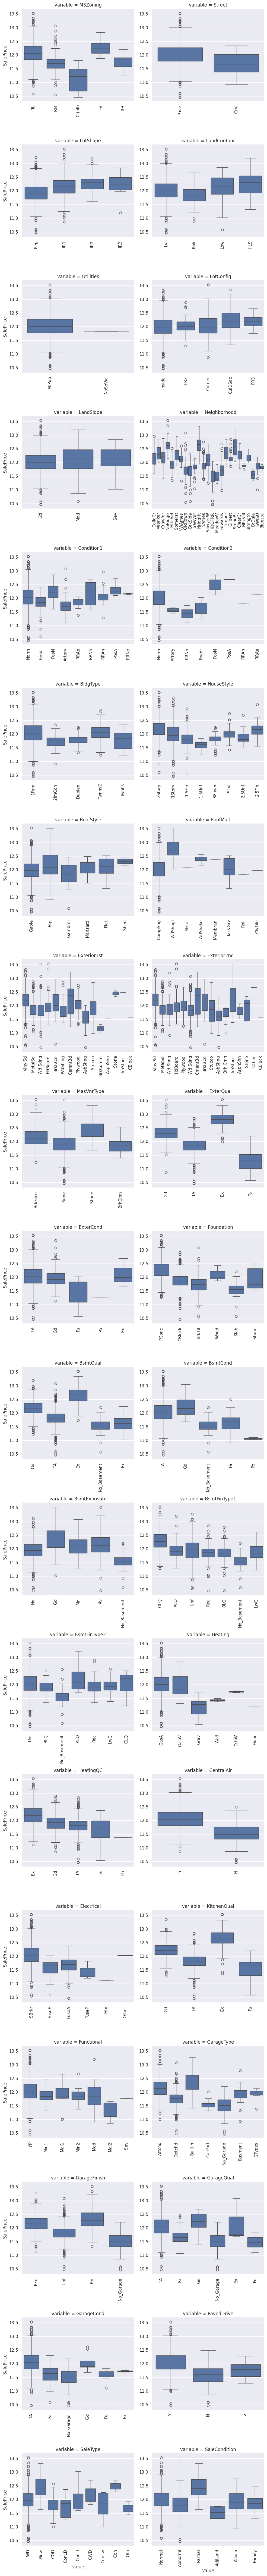

In [51]:
for c in qualitative:
    housing[c] = housing[c].astype('category')
    if housing[c].isnull().any():
        housing[c] = housing[c].cat.add_categories(['MISSING'])
        housing[c] = housing[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

# Create dummy variables

In [99]:
#Categorical columns
housing.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [100]:
## Separate the categorical and numerical features again from original dataframe
## (as we have added one feature and removed two from original data)
housing_num = housing.select_dtypes(include=['int64', 'float64'])
housing_cat = housing.select_dtypes(include='object')

In [101]:
## One hot encoding the categorical columns
housing_cat_encoded = pd.get_dummies(housing_cat, drop_first=True)
housing_cat_encoded.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [103]:
## Check the dimensions
housing_cat_encoded.shape

(1460, 206)

**Outlier treatment**

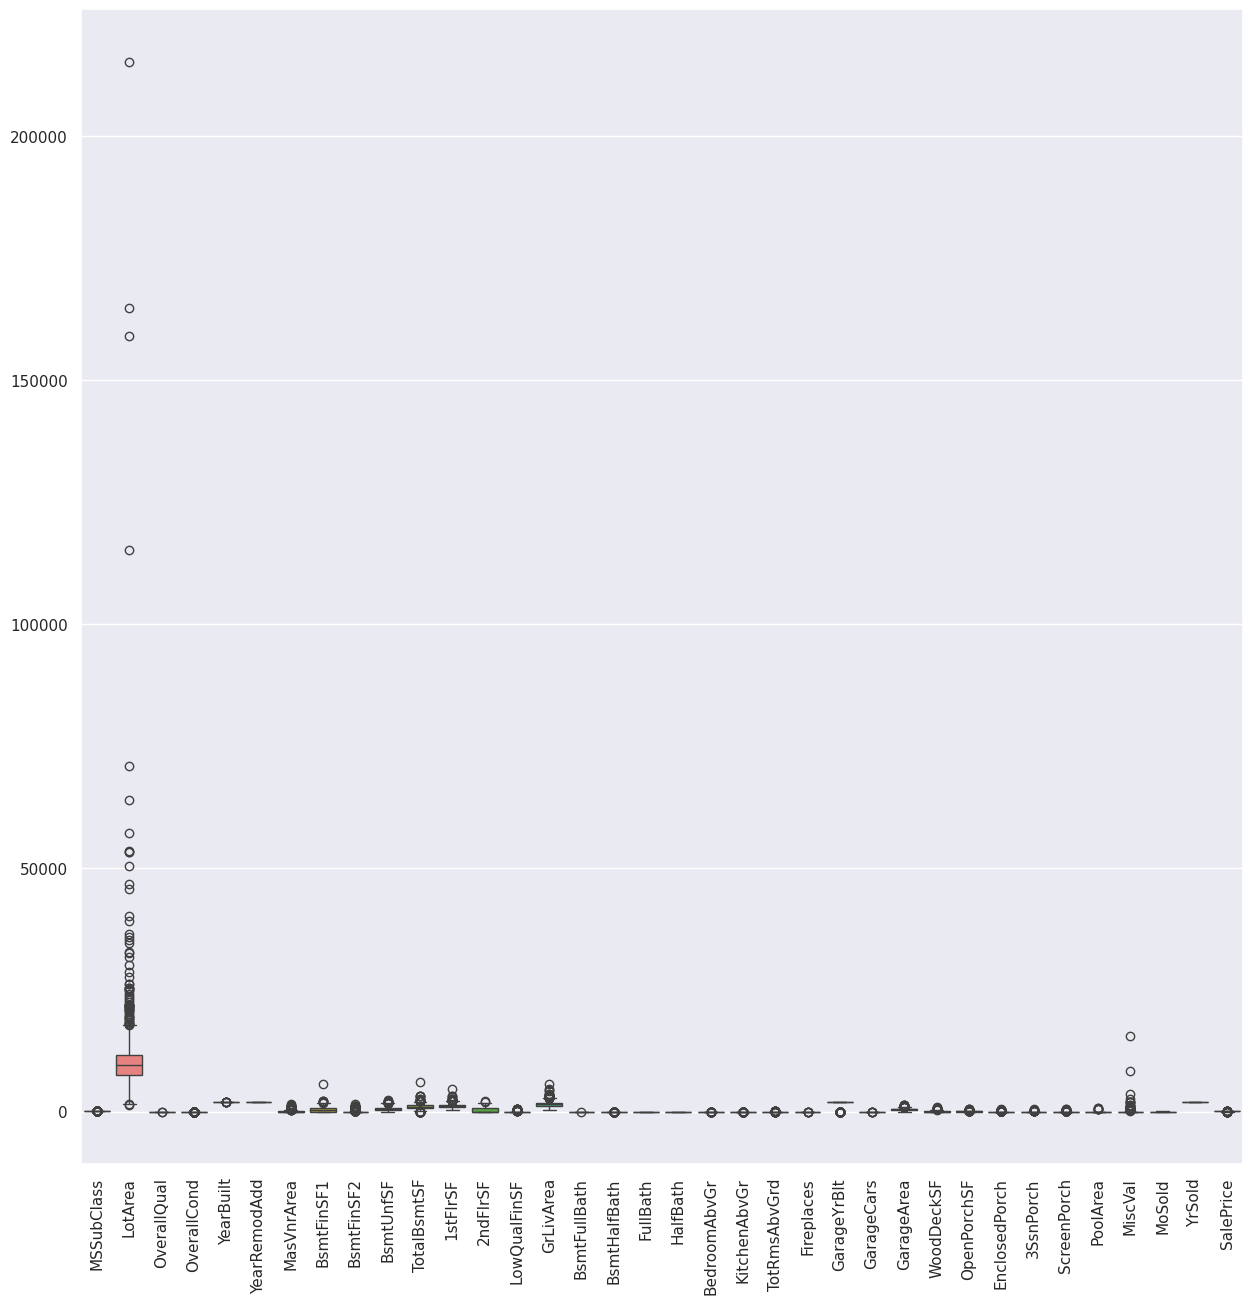

In [105]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housing_num);

In [108]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in housing_num.columns:
    housing_num[col][housing_num[col] <= housing_num[col].quantile(0.05)] = housing_num[col].quantile(0.05)
    housing_num[col][housing_num[col] >= housing_num[col].quantile(0.95)] = housing_num[col].quantile(0.95)

<Axes: >

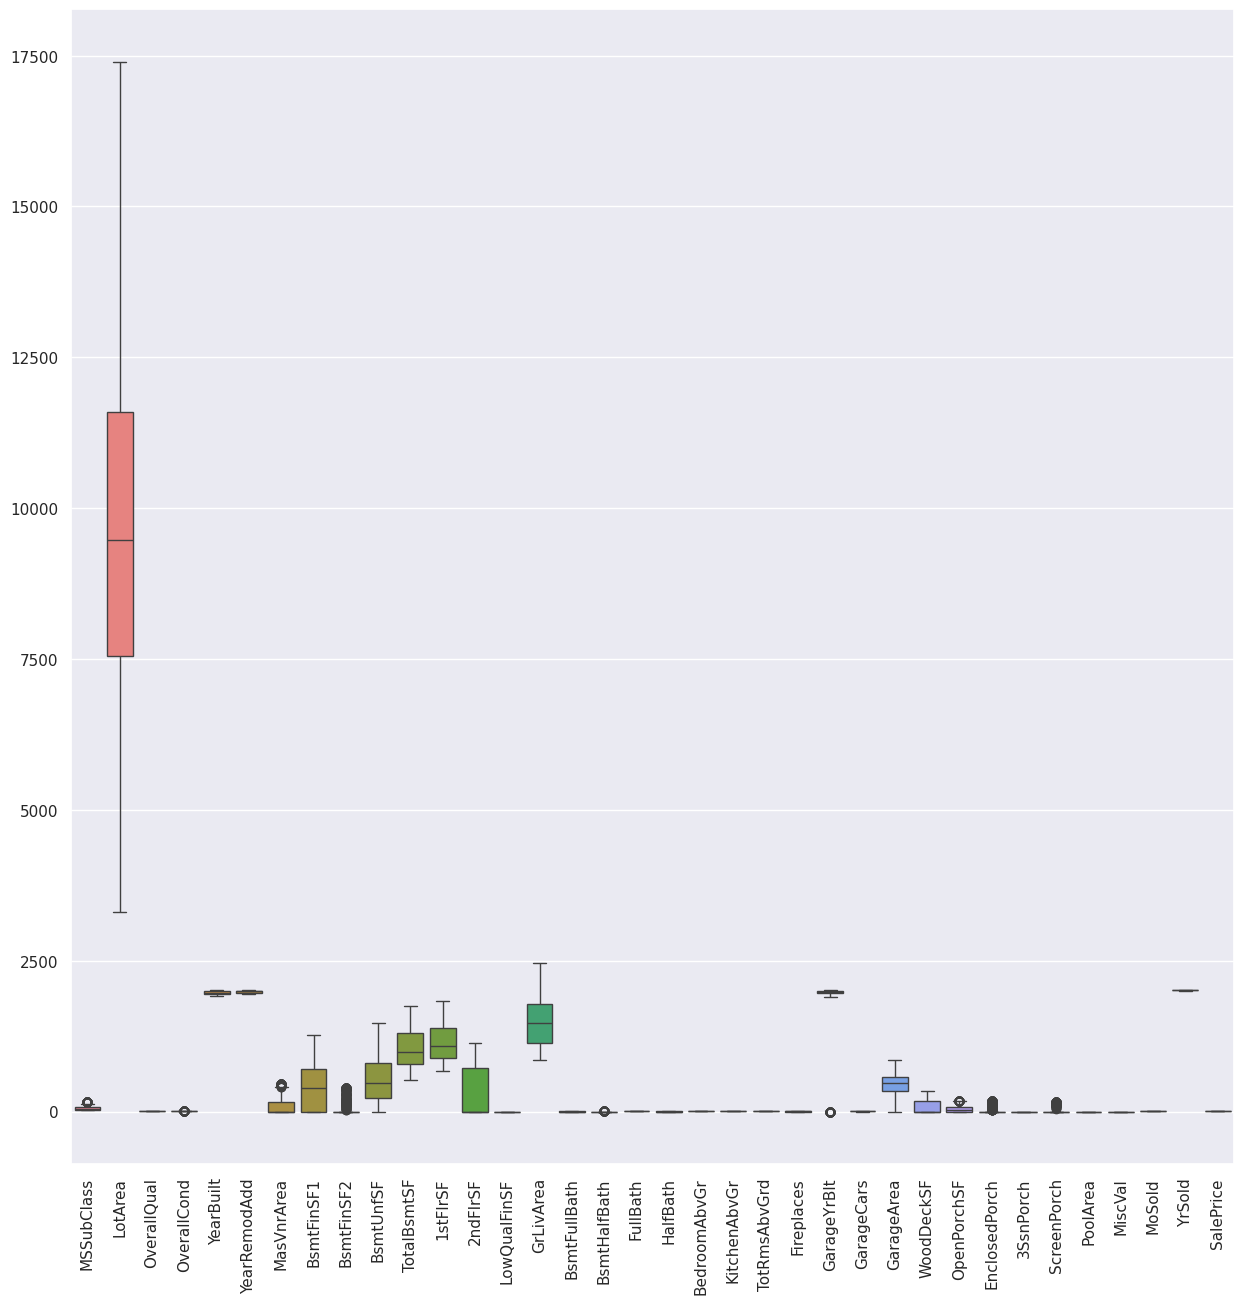

In [109]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housing_num)

In [111]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
housing = pd.concat([housing_num, housing_cat_encoded], axis=1)


## View the first few rows of our dataframe
housing.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,...,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450.0,7,5,2003,2003,196.0,706,0.0,150,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003,2,548.0,0,61.0,0.00,0,0,0,0,2,2008,12.247694,0,0,1,0,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600.0,6,8,1976,1976,0.0,978,0.0,284,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976,2,460.0,298,0.0,0.00,0,0,0,0,5,2007,12.109011,0,0,1,0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250.0,7,5,2001,2002,162.0,486,0.0,434,920.0,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2001,2,608.0,0,42.0,0.00,0,0,0,0,9,2008,12.317167,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,9550.0,7,5,1916,1970,0.0,216,0.0,540,756.0,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,1998,3,642.0,0,35.0,180.15,0,0,0,0,2,2006,11.849398,0,0,1,0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,14260.0,8,5,2000,2000,350.0,655,0.0,490,1145.0,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,2000,3,836.0,192,84.0,0.00,0,0,0,0,11,2008,12.429216,0,0,1,0,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# **Train Test Split**

In [118]:
df_train,df_test = train_test_split(housing, train_size=0.7,test_size = 0.3, random_state=100)


In [119]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [120]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [123]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

# **Model Building**

In [132]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming 'reg' is your estimator (e.g., a linear regression model)
reg = LinearRegression()

# Initialize RFE with the estimator and the number of features to select (e.g., 20)
rfe = RFE(estimator=reg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [133]:
col=X_train.columns[rfe.support_]
col

Index(['YearBuilt', 'GrLivArea', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Condition2_PosA', 'Condition2_PosN',
       'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior2nd_AsphShn',
       'BsmtExposure_Gd', 'Heating_OthW', 'Functional_Sev', 'Functional_Typ'],
      dtype='object')

In [134]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.2
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:57:37   Log-Likelihood:                 3071.2
No. Observations:                1021   AIC:                            -6100.
Df Residuals:                    1000   BIC:                            -5997.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.4047      0.012    195.844      0.000       2.381       2.429
YearBuilt                0.0139      0.000     33.460      0.000       0.013       0.015
GrLivArea                0.0168      0.000     40.865      0.000       0.016       0.018
Neighborhood_BrDale     -0.0253      0.004     -7.168      0.000      -0.032      -0.018
Neighborhood_Crawfor     0.0199      0.002      8.919      0.000       0.016       0.024
Neighborhood_MeadowV    -0.0303      0.004     -7.445      0.000      -0.038      -0.022
Condition2_PosA          0.0445      0.012      3.659      0.000       0.021       0.068
Condition2_PosN         -0.0584      0.012     -4.801      0.000      -0.082      -0.035
BldgType_Duplex         -0.0243      0.002    -12.368      0.000      -0.028      -0.020
RoofMatl_CompShg         0.0704      0.012      5.782      0.000       0.046       0.094
RoofMatl_Membran         0.1123      0.017      6.533      0.000       0.079       0.146
RoofMatl_Metal           0.0836      0.017      4.881      0.000       0.050       0.117
RoofMatl_Roll            0.0739      0.017      4.281      0.000       0.040       0.108
RoofMatl_Tar&Grv         0.0696      0.013      5.239      0.000       0.044       0.096
RoofMatl_WdShake         0.0732      0.014      5.409      0.000       0.047       0.100
RoofMatl_WdShngl         0.0801      0.014      5.930      0.000       0.054       0.107
Exterior2nd_AsphShn     -0.0219      0.012     -1.793      0.073      -0.046       0.002
BsmtExposure_Gd          0.0139      0.001     10.194      0.000       0.011       0.017
Heating_OthW            -0.0318      0.012     -2.614      0.009      -0.056      -0.008
Functional_Sev          -0.0390      0.013     -2.928      0.003      -0.065      -0.013
Functional_Typ           0.0116      0.002      7.150      0.000       0.008       0.015
==============================================================================
Omnibus:                        7.154   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                9.570
Skew:                          -0.026   Prob(JB):                      0.00835
Kurtosis:                       3.471   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Ridge Regression**

In [136]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.006100425438671389


In [138]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016137,0.001323,0.006115,0.000202,0.0001,{'alpha': 0.0001},-0.007091,-0.006864,-0.006622,-0.006874,-0.006290,-0.006748,0.000273,26,-0.004284,-0.004273,-0.004372,-0.004311,-0.004416,-0.004331,0.000055
1,0.029626,0.007378,0.011008,0.000892,0.001,{'alpha': 0.001},-0.007082,-0.006861,-0.006625,-0.006863,-0.006285,-0.006743,0.000271,25,-0.004285,-0.004273,-0.004373,-0.004313,-0.004418,-0.004332,0.000055
2,0.024574,0.006322,0.009679,0.002878,0.01,{'alpha': 0.01},-0.007010,-0.006834,-0.006653,-0.006771,-0.006237,-0.006701,0.000259,24,-0.004294,-0.004276,-0.004381,-0.004329,-0.004437,-0.004343,0.000059
3,0.018920,0.007967,0.008735,0.002576,0.05,{'alpha': 0.05},-0.006852,-0.006764,-0.006717,-0.006546,-0.006131,-0.006602,0.000256,23,-0.004344,-0.004288,-0.004411,-0.004389,-0.004505,-0.004387,0.000072
4,0.029677,0.000684,0.012075,0.000671,0.1,{'alpha': 0.1},-0.006770,-0.006725,-0.006753,-0.006426,-0.006066,-0.006548,0.000272,22,-0.004391,-0.004300,-0.004442,-0.004444,-0.004563,-0.004428,0.000085
5,0.025838,0.006483,0.010313,0.002288,0.2,{'alpha': 0.2},-0.006685,-0.006688,-0.006763,-0.006320,-0.005994,-0.006490,0.000292,21,-0.004459,-0.004320,-0.004477,-0.004510,-0.004631,-0.004479,0.000100
6,0.027967,0.007635,0.010046,0.002224,0.3,{'alpha': 0.3},-0.006631,-0.006663,-0.006745,-0.006250,-0.005941,-0.006446,0.000305,20,-0.004502,-0.004337,-0.004502,-0.004553,-0.004674,-0.004514,0.000108
7,0.018025,0.006821,0.008061,0.002728,0.4,{'alpha': 0.4},-0.006588,-0.006645,-0.006721,-0.006198,-0.005894,-0.006409,0.000314,19,-0.004532,-0.004351,-0.004523,-0.004584,-0.004706,-0.004539,0.000115
8,0.030716,0.000992,0.013681,0.003189,0.5,{'alpha': 0.5},-0.006551,-0.006630,-0.006695,-0.006172,-0.005853,-0.006380,0.000320,18,-0.004558,-0.004362,-0.004541,-0.004610,-0.004732,-0.004560,0.000120
9,0.020644,0.007528,0.007148,0.002411,0.6,{'alpha': 0.6},-0.006518,-0.006619,-0.006675,-0.006151,-0.005819,-0.006357,0.000325,17,-0.004579,-0.004373,-0.004556,-0.004631,-0.004753,-0.004578,0.000123


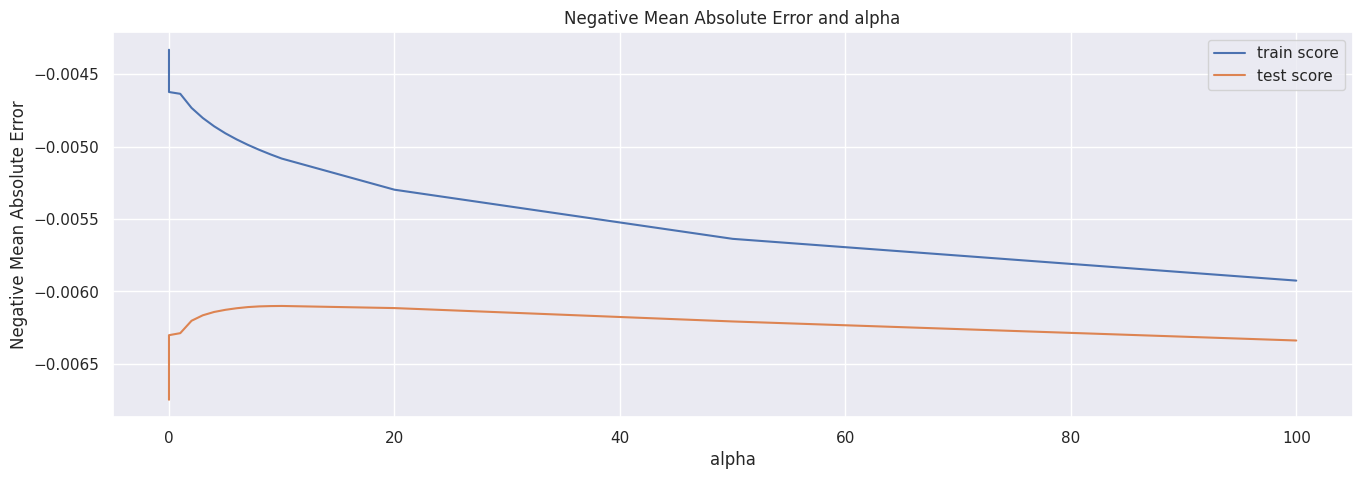

In [139]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [140]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.47804162e-03,  2.06495205e-03,  5.10101295e-03,  3.22502038e-03,
        3.69044666e-03,  1.89468418e-03, -1.80589541e-04, -8.61600998e-05,
       -6.37013029e-04, -1.89236270e-03,  5.69778247e-03,  2.66079132e-04,
        2.28615455e-03,  0.00000000e+00,  7.64827538e-03,  1.00370938e-03,
       -1.63160511e-05,  6.49110716e-04,  6.87404348e-04,  3.03341886e-04,
        0.00000000e+00, -8.37655134e-05,  1.41034216e-03, -2.29434094e-04,
        8.49252605e-04,  1.93420487e-03,  8.46587392e-04,  3.75954612e-04,
        1.38024090e-04,  0.00000000e+00,  4.90166086e-04,  0.00000000e+00,
        0.00000000e+00,  1.07658142e-04, -1.74743988e-04,  2.89825007e-03,
        1.69301336e-03,  1.88218395e-03, -1.70449334e-03, -3.71307059e-04,
        1.06367310e-04, -2.11292993e-03,  1.11444912e-04,  1.41360967e-03,
        1.44923346e-03,  1.49025725e-03, -8.72490864e-04,  2.02017758e-03,
       -1.32799538e-03,  7.53099132e-05,  3.33415377e-04,  1.88645599e-03,
        1.23590665e-03,  

In [141]:
#lets predict the R-squared value
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9418344602474813


In [142]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9019913272606961


In [144]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

8.326049827193863e-05

# **Lasso Regression**


In [145]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [146]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)


In [147]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 5e-05}
-0.006051858753955212


In [148]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [149]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8945785925985351


In [150]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8633466965882921


In [151]:
mean_squared_error(y_test, y_test_pred)


0.00011608995219055167

In [152]:
lasso.coef_


array([-2.69404774e-04,  2.20181856e-03,  8.17198625e-03,  1.77594697e-03,
        5.12539960e-03,  2.90806167e-03,  0.00000000e+00,  2.01449940e-03,
        0.00000000e+00, -0.00000000e+00,  4.03513733e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.16044403e-03,  5.28659434e-04,
        0.00000000e+00,  0.00000000e+00,  1.06482734e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.18512438e-03,  0.00000000e+00,
        4.11001792e-04,  2.30034453e-03,  6.66736542e-04,  1.90885826e-05,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

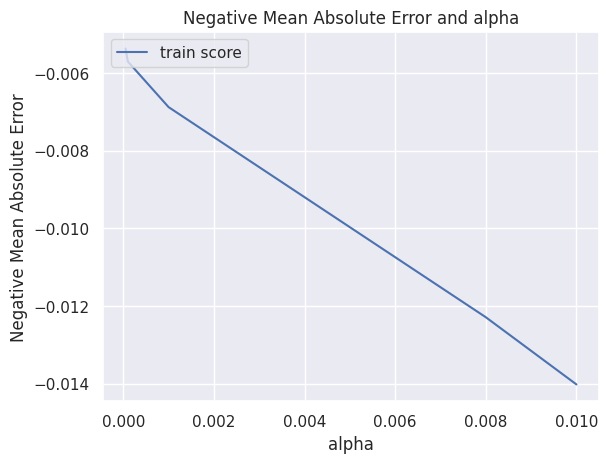

In [153]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [155]:
model_cv.best_params_


{'alpha': 10.0}

In [156]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9557410228835224
0.8857204064324237


In [157]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [158]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,2.413815
115,RoofMatl_WdShngl,0.041274
113,RoofMatl_Tar&Grv,0.039613
109,RoofMatl_CompShg,0.039475
110,RoofMatl_Membran,0.037930
114,RoofMatl_WdShake,0.037844
112,RoofMatl_Roll,0.037271
88,Condition2_PosA,0.032323
111,RoofMatl_Metal,0.030746
231,SaleType_ConLD,0.012551


In [159]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8945785925985351
0.8633466965882921


# **Lets observe the changes in the coefficients after regularization**

In [161]:
betas = pd.DataFrame(index=X_train.columns)


In [163]:
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-0.000386,-0.000269
LotArea,0.002537,0.002202
OverallQual,0.004243,0.008172
OverallCond,0.002891,0.001776
YearBuilt,0.004391,0.005125
YearRemodAdd,0.001976,0.002908
MasVnrArea,-0.000133,0.000000
BsmtFinSF1,-0.001765,0.002014
BsmtFinSF2,-0.001802,0.000000
BsmtUnfSF,-0.003242,-0.000000


# **After compairing both the model we can see that the below Features are best explaining the DataSet**
MSSubClass,
RoofMatl_WdShngl,
RoofMatl_Tar&Grv,
RoofMatl_CompShg,
RoofMatl_Membran,
RoofMatl_WdShake,
RoofMatl_Roll,
Condition2_PosA,
RoofMatl_Metal,
SaleType_ConLD


# **Problem Statement -Part 2**
##**Question 1**
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?



**Answer**
The optimal value of alpha for ridge and lasso regression

Ridge Alpha 10

lasso Alpha 0.001


**Ridge Regression**



In [174]:
#Change the alpha value from 10 to 20
alpha = 20
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)


Ridge(alpha=20)

In [181]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2score(train) ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2score(test) ", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

#Alpha 1
#R2score(train) 0.9557410228835224
#R2score(test)  0.8857204064324237


R2score(train)  0.9375802536320541
R2score(test)  0.9020292781816347
0.05482007596073344
0.03645397706511004
5.369253277251071e-05
8.322825813952065e-05


#**Changes in Ridge Regression metrics:**
R2 score of train set decreased from 0.95 to 0.93

R2 score of test set increased from 0.88 to 0.90

 **R2score on training data has decreased but it has increased on testing data**



# **Lasso**

In [176]:
#Changed alpha 0.001 to 0.002
alpha = 0.002
lasso20 = Lasso(alpha=alpha)
lasso20.fit(X_train, y_train)

Lasso(alpha=0.002)

In [182]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso20.predict(X_train)
y_pred_test = lasso20.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2score(train)  ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2score(test)  ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

#R2score at alpha-10
#R2score(train)  0.8945785925985351
#R2score(Test)  0.8633466965882921

R2score(train)   0.8756994796385147
R2score(test)   0.8453702876484173
0.1091668000060084
0.05753625045347463
0.00010692144956514045
0.00013136130240519323



#**Changes in Lasso metrics:**

R2 score of train set decreased from 0.89 to 0.87

R2 score of test set decreased from 0.86 to 0.84

**R2score on training data and testing data decreased**

In [183]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso20.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge2,Ridge,Lasso,Lasso20
MSSubClass,-0.001473,-0.000386,-0.000269,-0.000000
LotArea,0.001990,0.002537,0.002202,0.001848
OverallQual,0.005305,0.004243,0.008172,0.008433
OverallCond,0.003265,0.002891,0.001776,0.000000
YearBuilt,0.003497,0.004391,0.005125,0.003557
YearRemodAdd,0.001899,0.001976,0.002908,0.003243
MasVnrArea,-0.000068,-0.000133,0.000000,0.000000
BsmtFinSF1,0.000540,-0.001765,0.002014,0.001881
BsmtFinSF2,-0.000343,-0.001802,0.000000,0.000000
BsmtUnfSF,-0.001277,-0.003242,-0.000000,-0.000000



**coefficent of these predictor has changed**


##**Now, we look at the most important predictor variables after the change is implemented.¶:**


In [184]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

RoofMatl_WdShngl            0.041274
RoofMatl_Tar&Grv            0.039613
RoofMatl_CompShg            0.039475
RoofMatl_Membran            0.037930
RoofMatl_WdShake            0.037844
RoofMatl_Roll               0.037271
Condition2_PosA             0.032323
RoofMatl_Metal              0.030746
SaleType_ConLD              0.012551
BsmtFinType2_No_Basement    0.012314
Name: Ridge, dtype: float64

In [185]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

RoofMatl_WdShngl            1.042138
RoofMatl_Tar&Grv            1.040408
RoofMatl_CompShg            1.040264
RoofMatl_Membran            1.038659
RoofMatl_WdShake            1.038569
RoofMatl_Roll               1.037975
Condition2_PosA             1.032851
RoofMatl_Metal              1.031224
SaleType_ConLD              1.012630
BsmtFinType2_No_Basement    1.012390
Name: Ridge, dtype: float64

In [186]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual     0.008172
GrLivArea       0.008160
YearBuilt       0.005125
TotalBsmtSF     0.004035
YearRemodAdd    0.002908
GarageArea      0.002300
LotArea         0.002202
Fireplaces      0.002185
BsmtFinSF1      0.002014
OverallCond     0.001776
Name: Lasso, dtype: float64

In [187]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual     1.008205
GrLivArea       1.008194
YearBuilt       1.005139
TotalBsmtSF     1.004043
YearRemodAdd    1.002912
GarageArea      1.002303
LotArea         1.002204
Fireplaces      1.002188
BsmtFinSF1      1.002017
OverallCond     1.001778
Name: Lasso, dtype: float64

So, the most important predictor variables after we double the alpha values are:-

OverallQual
GrLivArea    
YearBuilt      
TotalBsmtSF    
YearRemodAdd
GarageArea    
LotArea       
Fireplaces     
BsmtFinSF1    
OverallCond
RoofMatl_WdShngl            
RoofMatl_Tar&Grv            
RoofMatl_CompShg            
RoofMatl_Membran           
RoofMatl_WdShake            
RoofMatl_Roll              
Condition2_PosA             
RoofMatl_Metal              
SaleType_ConLD             
BsmtFinType2_No_Basement    

#**Question 3**
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


**Answer**
Here, we will drop the top 5 features in Lasso model and build the model again.

Top 5 Lasso predictors were:

1. OverallQual
2. GrLivArea  
3. YearBuilt      
4. TotalBsmtSF    
5. YearRemodAdd


In [188]:
## Create a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'YearRemodAdd']

In [189]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [190]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)
lassoCV.fit(X_train_dropped, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [191]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.0001}

Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.¶

In [192]:
# Create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [193]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [195]:
## Check metrics
## Create a list of all metrics (will be used in creating a final summary in the end)
metric = []
## R-squared of train and test data
print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
metric.append(r2_score(y_train, y_train_pred))
print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
metric.append(r2_score(y_test, y_pred))

## Residual sum of squares of train and test data
rss_train = np.sum(np.square(y_train - y_train_pred))
metric.append(rss_train)
rss_test = np.sum(np.square(y_test - y_pred))
metric.append(rss_test)
print("RSS (Train) =", '%.2f' % rss_train)
print("RSS (Test) =", '%.2f' % rss_test)

## Mean Squared Error of train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
metric.append(mse_train)
mse_test = mean_squared_error(y_test, y_pred)
metric.append(mse_test)
print("MSE (Train) =", '%.2f' % mse_train)
print("MSE (Test) =", '%.2f' % mse_test)

# Root Mean Squared Error for train and test data
rmse_train = mse_train**0.5
metric.append(rmse_train)
rmse_test = mse_test**0.5
metric.append(rmse_test)
print("RMSE (Train) =", '%.2f' % rmse_train)
print("RMSE (Test) =", '%.2f' % rmse_test)

R-Squared (Train) = 0.84
R-Squared (Test) = 0.84
RSS (Train) = 0.14
RSS (Test) = 0.06
MSE (Train) = 0.00
MSE (Test) = 0.00
RMSE (Train) = 0.01
RMSE (Test) = 0.01


Now, we will find the top 5 predictors¶

In [196]:
lasso_metrics = metric

In [197]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score (Train),0.844571
R2 Score (Test),0.837165
RSS (Train),0.136505
RSS (Test),0.060589
MSE (Train),0.000134
MSE (Test),0.000138
RMSE (Train),0.011563
RMSE (Test),0.011761


In [198]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
MSSubClass
LotArea
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
1stFlrSF
2ndFlrSF
LowQualFinSF


In [200]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_
## View the betas/coefficients
betas

,Lasso
MSSubClass,-0.000170
LotArea,0.001684
OverallCond,0.002052
MasVnrArea,0.000582
BsmtFinSF1,0.003789
BsmtFinSF2,0.000000
BsmtUnfSF,0.001309
1stFlrSF,0.007313
2ndFlrSF,0.003973
LowQualFinSF,0.000000


**Now, we will look at the top 5 features significant in predicting the value of a house according to the new lasso model**

In [201]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

1stFlrSF            0.007313
Foundation_PConc    0.005725
2ndFlrSF            0.003973
BsmtFinSF1          0.003789
GarageArea          0.003728
Name: Lasso, dtype: float64

📌 After dropping our top 5 lasso predictors, we get the following new top 5 predictors:-¶

1. 1stFlrSF            
2. Foundation_PConc   
3. ndFlrSF           
4. BsmtFinSF1        
5. GarageArea         